In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
from sklearn.linear_model import LassoCV, Lasso

In [2]:
dataset = pd.read_csv("PatientInfo.csv", encoding='latin-1')

In [3]:
dataset.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [4]:
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# dataset = pd.DataFrame(imp.fit_transform(dataset),
#                    columns=dataset.columns,
#                    index=dataset.index)
dataset = dataset.fillna("-1")

In [5]:
dataset.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,-1,75,2020-01-22,2020-01-23,2020-02-05,-1,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,-1,31,-1,2020-01-30,2020-03-02,-1,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,-1,2020-01-30,2020-02-19,-1,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,-1,9,2020-01-26,2020-01-30,2020-02-15,-1,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,-1,2020-01-31,2020-02-24,-1,released


In [6]:
dataset.dtypes

patient_id             int64
sex                   object
age                   object
country               object
province              object
city                  object
infection_case        object
infected_by           object
contact_number        object
symptom_onset_date    object
confirmed_date        object
released_date         object
deceased_date         object
state                 object
dtype: object

In [7]:
dataset.columns

Index(['patient_id', 'sex', 'age', 'country', 'province', 'city',
       'infection_case', 'infected_by', 'contact_number', 'symptom_onset_date',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')

In [8]:
updated_dataset = pd.DataFrame()
for item in dataset.columns:
    updated_dataset[item+ "_Cat"] = labelencoder.fit_transform(dataset[item].astype(str))

In [9]:
#dataset.interpolate(method ='linear', limit_direction ='forward')
# dataset = dataset.dropna()
updated_dataset

,patient_id_Cat,sex_Cat,age_Cat,country_Cat,province_Cat,city_Cat,infection_case_Cat,infected_by_Cat,contact_number_Cat,symptom_onset_date_Cat,confirmed_date_Cat,released_date_Cat,deceased_date_Cat,state_Cat
0,0,2,7,8,15,40,51,0,80,3,2,1,0,2
1,1,2,5,8,15,94,51,0,43,1,5,18,0,2
2,2,2,7,8,15,92,47,475,23,1,5,9,0,2
3,3,2,4,8,15,96,51,0,87,4,5,6,0,2
4,4,1,4,8,15,125,47,1,28,1,6,12,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,5159,1,5,8,11,87,51,0,34,1,117,119,0,2
5161,5160,0,0,8,11,87,51,0,1,1,134,127,0,2
5162,5161,0,0,0,11,87,51,0,78,1,136,0,0,1
5163,5162,0,0,0,11,87,51,0,1,1,136,0,0,1


In [10]:
def knnModel(X, y):
    print('Features : ')
    print(X)
    print('Label : ')
    print(y)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import classification_report, confusion_matrix
    print('Confusion Matrix : ')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report : ')
    print(classification_report(y_test, y_pred))
    
    
    error = []

    # Calculating the error for K values between 1 and 40
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error.append(np.mean(pred_i != y_test))
        
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')
    
    
    #checking the accuracy of our model on the test data
    print('KNN Score : ')
    print(knn.score(X_test, y_test))
    
    from sklearn.model_selection import cross_val_score
    #training the model with cv of 5 
    knn_classifier = KNeighborsClassifier(n_neighbors=5)
    cv_scores = cross_val_score(knn_classifier, X, y, cv=5)
    #printing each cv score (accuracy) and averaging them
    print('Cross Validation Scores : ')
    print(cv_scores)
    print('cv_scores mean:{}'.format(np.mean(cv_scores)))
    
#     #performing leaveOneOut cross validation
#     from sklearn.model_selection import LeaveOneOut
#     loo = LeaveOneOut()
#     cv_scores = cross_val_score(knn_classifier, X, y, cv=loo)
#     #print each cv score (accuracy) and average them
#     print('Cross Validation Leave One Out Scores : ')
#     print(cv_scores)
#     print('cv_scores mean:{}'.format(np.mean(cv_scores)))
    
    #searching for the best k value using GridSearchCV
    from sklearn.model_selection import GridSearchCV
    knn_classifier2 = KNeighborsClassifier()
    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {'n_neighbors': np.arange(1, 40)}
    #use gridsearch to test all values for n_neighbors
    knn_gscv = GridSearchCV(knn_classifier2, param_grid, cv=5)
    #fit model to data
    knn_gscv.fit(X, y)
    
    
    #checking top performing n_neighbors value
    print('Best K Value : ')
    print(knn_gscv.best_params_)
    
    
    #checking mean score for the top performing value of n_neighbors
    print('Best KNN Score : ')
    print(knn_gscv.best_score_)

Features : 
[[   0    2    7 ...    2    1    0]
 [   1    2    5 ...    5   18    0]
 [   2    2    7 ...    5    9    0]
 ...
 [5161    0    0 ...  136    0    0]
 [5162    0    0 ...  136    0    0]
 [5163    0    0 ...  136    0    0]]
Label : 
[2 2 2 ... 1 1 1]
Confusion Matrix : 
[[  9   0   2]
 [  0 402  28]
 [  0  24 568]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.94      0.93      0.94       430
           2       0.95      0.96      0.95       592

    accuracy                           0.95      1033
   macro avg       0.96      0.90      0.93      1033
weighted avg       0.95      0.95      0.95      1033

KNN Score : 
0.9283639883833494
Cross Validation Scores : 
[0.61508704 0.18375242 0.53094778 0.53197674 0.71483996]
cv_scores mean:0.5153207878862631


C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed

Best K Value : 
{'n_neighbors': 37}
Best KNN Score : 
0.6226524685382382


C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\a

['sex_Cat', 'age_Cat', 'country_Cat', 'province_Cat', 'infection_case_Cat', 'contact_number_Cat', 'symptom_onset_date_Cat', 'confirmed_date_Cat', 'released_date_Cat', 'deceased_date_Cat']


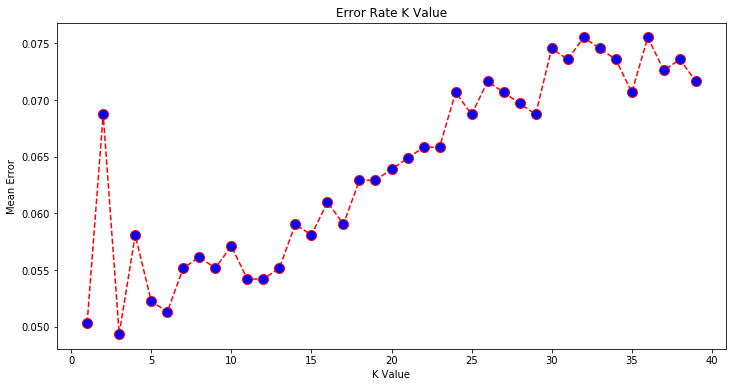

In [11]:
features = ['patient_id', 'sex', 'age', 'country', 'province', 'city',
       'infection_case', 'infected_by', 'contact_number', 'symptom_onset_date',
       'confirmed_date', 'released_date', 'deceased_date']

features_list = ['patient_id_Cat', 'sex_Cat', 'age_Cat', 'country_Cat', 'province_Cat', 'city_Cat',
       'infection_case_Cat', 'infected_by_Cat', 'contact_number_Cat', 'symptom_onset_date_Cat',
       'confirmed_date_Cat', 'released_date_Cat', 'deceased_date_Cat']


X = updated_dataset.loc[:, features_list].values

weights = {'patient_id_Cat':1, 'sex_Cat':5, 'age_Cat':5, 'country_Cat':5, 'province_Cat':3, 'city_Cat':2,
       'infection_case_Cat':1, 'infected_by_Cat':4, 'contact_number_Cat':5, 'symptom_onset_date_Cat':3,
       'confirmed_date_Cat':2, 'released_date_Cat':1, 'deceased_date_Cat':1}


original_weights = {'patient_id':5, 'sex':3, 'age':3, 'country':2, 'province':3, 'city':3,
       'infection_case':1, 'infected_by':4, 'contact_number':1, 'symptom_onset_date':1,
       'confirmed_date':1, 'released_date':1, 'deceased_date':1}


y = updated_dataset.loc[:, ['state_Cat']].values
knnModel(X,y.ravel()) 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe_model = RFE(model, 10)
rfe_fit = rfe_model.fit(X, y)
colsNotToDrop = []
for feature_list_index in rfe_fit.get_support(indices=True):
    colsNotToDrop.append(updated_dataset.columns[feature_list_index])
print(colsNotToDrop)

In [12]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

class PFA(object):
    def __init__(self, n_features, q=None):
        self.q = q
        self.n_features = n_features

    def fit(self, X):
        if not self.q:
            self.q = X.shape[1]

        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA(n_components=self.q).fit(X)
        A_q = pca.components_.T

        kmeans = KMeans(n_clusters=self.n_features).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]

In [13]:
pfa = PFA(n_features=10)
pfa.fit(X)

# To get the transformed matrix
matrix = pfa.features_

# To get the column indices of the kept features
column_indices = pfa.indices_

In [14]:
column_indices

[0, 1, 3, 4, 5, 6, 10, 9, 11, 12]

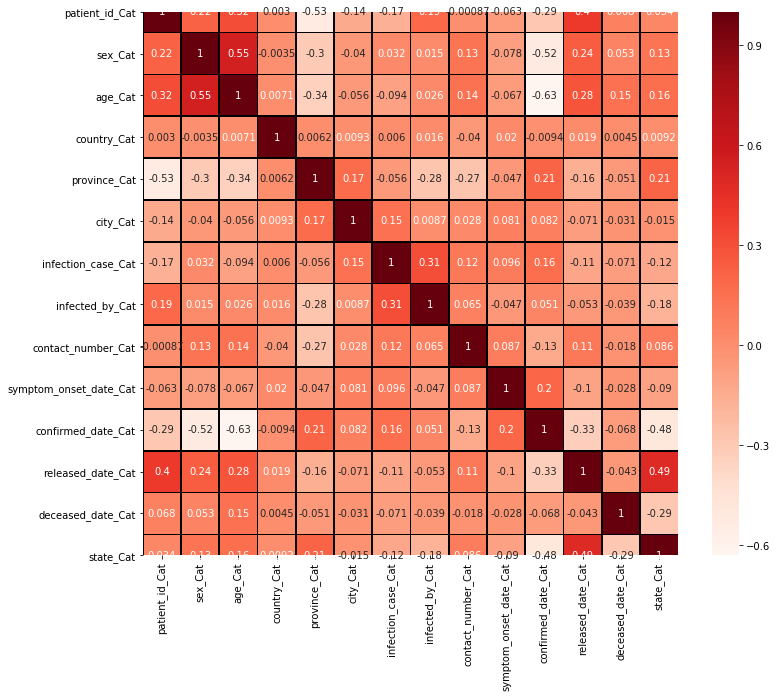

In [15]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = updated_dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, linewidths=.7,linecolor='black')
plt.show()

In [16]:
import statsmodels.api as sm
X = updated_dataset.drop("state_Cat",1)   #Feature Matrix
y = updated_dataset["state_Cat"]
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
feature_weights = model.pvalues
feature_weights

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                      4.417605e-98
patient_id_Cat             9.629040e-05
sex_Cat                    2.570991e-13
age_Cat                    6.868681e-15
country_Cat                9.097536e-01
province_Cat              1.790054e-140
city_Cat                   1.015525e-02
infection_case_Cat         9.412858e-01
infected_by_Cat            5.848114e-06
contact_number_Cat         9.113512e-14
symptom_onset_date_Cat     1.939970e-06
confirmed_date_Cat         0.000000e+00
released_date_Cat         2.549979e-298
deceased_date_Cat         8.073581e-179
dtype: float64

In [17]:
def remap( x, oMin, oMax, nMin, nMax ):

    #range check
    if oMin == oMax:
        print("Warning: Zero input range")
        return None

    if nMin == nMax:
        print("Warning: Zero output range")
        return None

    #check reversed input range
    reverseInput = False
    oldMin = min( oMin, oMax )
    oldMax = max( oMin, oMax )
    if not oldMin == oMin:
        reverseInput = True

    #check reversed output range
    reverseOutput = False   
    newMin = min( nMin, nMax )
    newMax = max( nMin, nMax )
    if not newMin == nMin :
        reverseOutput = True

    portion = (x-oldMin)*(newMax-newMin)/(oldMax-oldMin)
    if reverseInput:
        portion = (oldMax-x)*(newMax-newMin)/(oldMax-oldMin)

    result = portion + newMin
    if reverseOutput:
        result = newMax - portion

    return result

In [18]:
#privacy scoring (after multiplying the weights)
import operator

old_min=0.0
new_min=1.0
old_max=1.0
new_max=5.0
scaled_numbers = {}
     
for x in weights:
    multiplication_value = weights[x] * feature_weights[x]
    scaled_number = remap(multiplication_value, old_min, old_max, new_min, new_max )
    scaled_numbers[x] = scaled_number
print("Privacy Scoring :")
cd = sorted(scaled_numbers.items(),key=operator.itemgetter(1),reverse=True)
cd

Privacy Scoring :


[('country_Cat', 19.19507166311717),
 ('infection_case_Cat', 4.765143172382365),
 ('city_Cat', 1.0812419652413776),
 ('patient_id_Cat', 1.0003851615949158),
 ('infected_by_Cat', 1.0000935698166773),
 ('symptom_onset_date_Cat', 1.0000232796397601),
 ('sex_Cat', 1.0000000000051419),
 ('contact_number_Cat', 1.0000000000018228),
 ('age_Cat', 1.0000000000001374),
 ('province_Cat', 1.0),
 ('confirmed_date_Cat', 1.0),
 ('released_date_Cat', 1.0),
 ('deceased_date_Cat', 1.0)]

In [19]:
dataset['privacy_score'] = 0
dataset.dtypes

patient_id             int64
sex                   object
age                   object
country               object
province              object
city                  object
infection_case        object
infected_by           object
contact_number        object
symptom_onset_date    object
confirmed_date        object
released_date         object
deceased_date         object
state                 object
privacy_score          int64
dtype: object

In [20]:
old_min=0.0
new_min=1.0
old_max=29.0
new_max=5.0
sum = 0
count = 0

for index, row in dataset.iterrows():
    weight = 0
    for item in features:
        if row[item] != '-1':
            weight += original_weights[item]
    scaled_number = round(remap(weight, old_min, old_max, new_min, new_max ))
    sum += scaled_number
    count += 1
    dataset.at[index,"privacy_score"] = scaled_number

In [21]:
print("Average Scoring:", (sum/count))

Average Scoring: 3.8902226524685384


In [22]:
 dataset
#users privacy score

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,privacy_score
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,-1,75,2020-01-22,2020-01-23,2020-02-05,-1,released,4
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,-1,31,-1,2020-01-30,2020-03-02,-1,released,4
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,-1,2020-01-30,2020-02-19,-1,released,5
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,-1,9,2020-01-26,2020-01-30,2020-02-15,-1,released,4
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,-1,2020-01-31,2020-02-24,-1,released,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,-1,25,-1,2020-05-30,2020-06-13,-1,released,4
5161,7000000016,-1,-1,Korea,Jeju-do,Jeju-do,overseas inflow,-1,-1,-1,2020-06-16,2020-06-24,-1,released,3
5162,7000000017,-1,-1,Bangladesh,Jeju-do,Jeju-do,overseas inflow,-1,72,-1,2020-06-18,-1,-1,isolated,3
5163,7000000018,-1,-1,Bangladesh,Jeju-do,Jeju-do,overseas inflow,-1,-1,-1,2020-06-18,-1,-1,isolated,3


In [23]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
pmaxes = []
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmaxes.append(p)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    
    
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_features_BE = cols
print(selected_features_BE)

['patient_id_Cat', 'sex_Cat', 'age_Cat', 'province_Cat', 'city_Cat', 'infected_by_Cat', 'contact_number_Cat', 'symptom_onset_date_Cat', 'confirmed_date_Cat', 'released_date_Cat', 'deceased_date_Cat']


In [24]:
cols

['patient_id_Cat',
 'sex_Cat',
 'age_Cat',
 'province_Cat',
 'city_Cat',
 'infected_by_Cat',
 'contact_number_Cat',
 'symptom_onset_date_Cat',
 'confirmed_date_Cat',
 'released_date_Cat',
 'deceased_date_Cat']

In [25]:
import random
import math
p= []
scaling = []
X_1 = X[cols]
X_1 = sm.add_constant(X_1)
model = sm.OLS(y,X_1).fit()
p = pd.Series(model.pvalues.values[1:],index = cols)

scaled_numbers = []

for item in p:
    scaled_number = remap(item, old_min, old_max, new_min, new_max )
    scaled_numbers.append(scaled_number)
    
scaled_numbers = [ele for ele in scaled_numbers] 
print(scaled_numbers)
print(selected_features_BE)
sorted_array = [x for _, x in sorted(zip(scaled_numbers,selected_features_BE), key=lambda pair: pair[0])]
print(sorted_array)

[1.0000101309125453, 1.0000000000000207, 1.0000000000000009, 1.0, 1.0012779920672368, 1.0000002101729177, 1.0000000000000102, 1.0000002616631092, 1.0, 1.0, 1.0]
['patient_id_Cat', 'sex_Cat', 'age_Cat', 'province_Cat', 'city_Cat', 'infected_by_Cat', 'contact_number_Cat', 'symptom_onset_date_Cat', 'confirmed_date_Cat', 'released_date_Cat', 'deceased_date_Cat']
['province_Cat', 'confirmed_date_Cat', 'released_date_Cat', 'deceased_date_Cat', 'age_Cat', 'contact_number_Cat', 'sex_Cat', 'infected_by_Cat', 'symptom_onset_date_Cat', 'patient_id_Cat', 'city_Cat']


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
model = LinearRegression()
rfe_final =  RFE(model)
rfe_features1 = []
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
    rfe_final = rfe
for feature_list_index in rfe_final.get_support(indices=True):
        rfe_features1.append(updated_dataset.columns[feature_list_index])
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.589239


In [27]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['sex_Cat', 'age_Cat', 'country_Cat', 'province_Cat', 'city_Cat',
       'contact_number_Cat', 'symptom_onset_date_Cat', 'confirmed_date_Cat',
       'released_date_Cat', 'deceased_date_Cat'],
      dtype='object')


In [28]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.026847
Best score using built-in LassoCV: 0.586261


C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [29]:
# print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Text(0.5, 1.0, 'Feature Importance using Lasso Model')

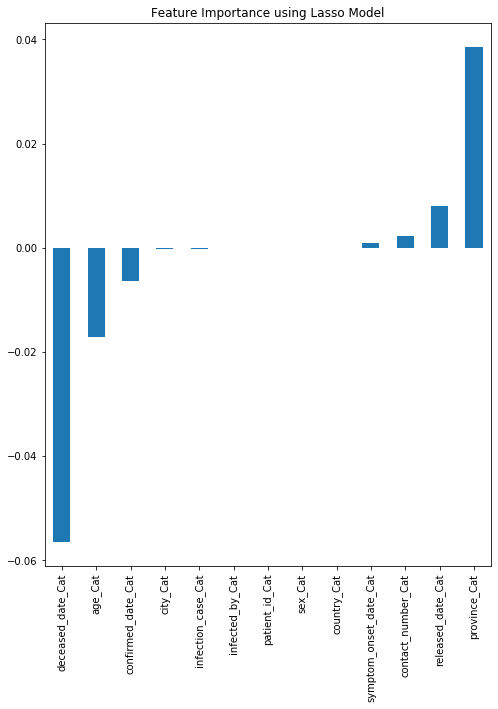

In [30]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "bar")
plt.title("Feature Importance using Lasso Model")

In [31]:
lasso_features = []
print(imp_coef)
for x,y in imp_coef.items():
    if y > -0.02:
        lasso_features.append(x)
print(lasso_features)

deceased_date_Cat        -0.056452
age_Cat                  -0.017088
confirmed_date_Cat       -0.006321
city_Cat                 -0.000231
infection_case_Cat       -0.000208
infected_by_Cat          -0.000147
patient_id_Cat           -0.000020
sex_Cat                  -0.000000
country_Cat              -0.000000
symptom_onset_date_Cat    0.000934
contact_number_Cat        0.002204
released_date_Cat         0.007963
province_Cat              0.038473
dtype: float64
['age_Cat', 'confirmed_date_Cat', 'city_Cat', 'infection_case_Cat', 'infected_by_Cat', 'patient_id_Cat', 'sex_Cat', 'country_Cat', 'symptom_onset_date_Cat', 'contact_number_Cat', 'released_date_Cat', 'province_Cat']


Features : 
      patient_id_Cat  sex_Cat  age_Cat  province_Cat  city_Cat  \
0                  0        2        7            15        40   
1                  1        2        5            15        94   
2                  2        2        7            15        92   
3                  3        2        4            15        96   
4                  4        1        4            15       125   
...              ...      ...      ...           ...       ...   
5160            5159        1        5            11        87   
5161            5160        0        0            11        87   
5162            5161        0        0            11        87   
5163            5162        0        0            11        87   
5164            5163        0        0            11        87   

      infected_by_Cat  contact_number_Cat  symptom_onset_date_Cat  \
0                   0                  80                       3   
1                   0                  43                

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best K Value : 
{'n_neighbors': 38}
Best KNN Score : 
0.6216844143272023


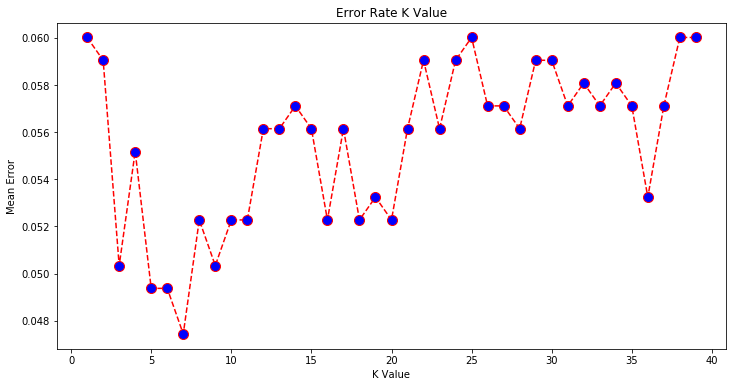

In [32]:
#backward elimination set
knnModel(updated_dataset[selected_features_BE],updated_dataset.iloc[:, -1].values)

Features : 
      sex_Cat  age_Cat  country_Cat  province_Cat  city_Cat  \
0           2        7            8            15        40   
1           2        5            8            15        94   
2           2        7            8            15        92   
3           2        4            8            15        96   
4           1        4            8            15       125   
...       ...      ...          ...           ...       ...   
5160        1        5            8            11        87   
5161        0        0            8            11        87   
5162        0        0            0            11        87   
5163        0        0            0            11        87   
5164        0        0            0            11        87   

      infection_case_Cat  infected_by_Cat  contact_number_Cat  \
0                     51                0                  80   
1                     51                0                  43   
2                     47            

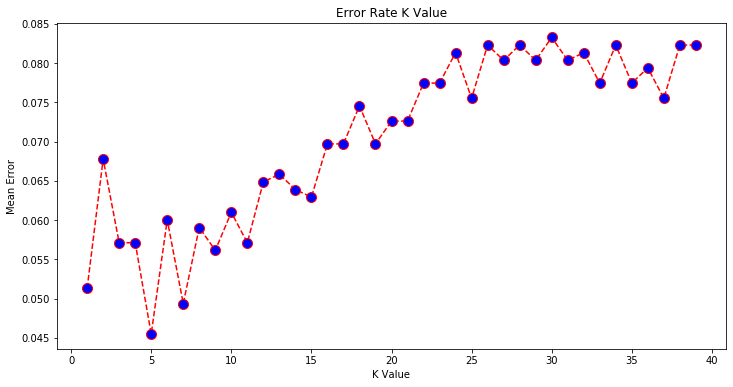

In [33]:
#feature selection with linear regression (12 features)
knnModel(updated_dataset[rfe_features1],updated_dataset.iloc[:, -1].values)

Features : 
      sex_Cat  age_Cat  country_Cat  province_Cat  city_Cat  \
0           2        7            8            15        40   
1           2        5            8            15        94   
2           2        7            8            15        92   
3           2        4            8            15        96   
4           1        4            8            15       125   
...       ...      ...          ...           ...       ...   
5160        1        5            8            11        87   
5161        0        0            8            11        87   
5162        0        0            0            11        87   
5163        0        0            0            11        87   
5164        0        0            0            11        87   

      contact_number_Cat  symptom_onset_date_Cat  confirmed_date_Cat  \
0                     80                       3                   2   
1                     43                       1                   5   
2              

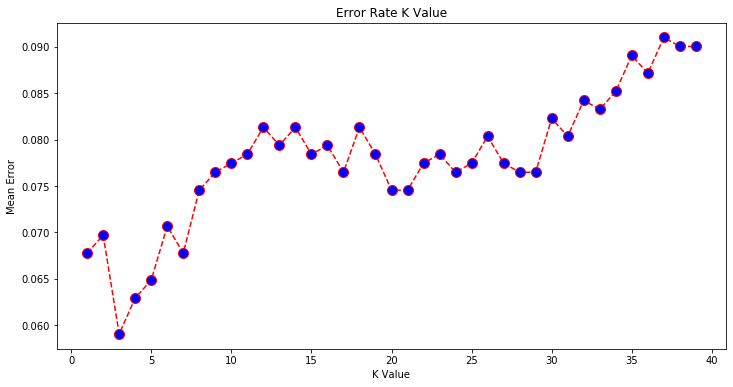

In [34]:
#feature selection with linear regression (10 features)
knnModel(updated_dataset[selected_features_rfe],updated_dataset.iloc[:, -1].values)

Features : 
      age_Cat  confirmed_date_Cat  city_Cat  infection_case_Cat  \
0           7                   2        40                  51   
1           5                   5        94                  51   
2           7                   5        92                  47   
3           4                   5        96                  51   
4           4                   6       125                  47   
...       ...                 ...       ...                 ...   
5160        5                 117        87                  51   
5161        0                 134        87                  51   
5162        0                 136        87                  51   
5163        0                 136        87                  51   
5164        0                 136        87                  51   

      infected_by_Cat  patient_id_Cat  sex_Cat  country_Cat  \
0                   0               0        2            8   
1                   0               1        2           

C:\Users\ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best K Value : 
{'n_neighbors': 37}
Best KNN Score : 
0.6224588576960309


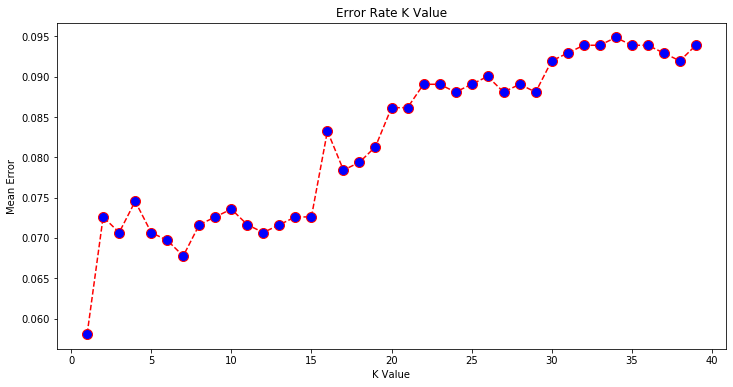

In [35]:
#feature selection with lasso
knnModel(updated_dataset[lasso_features],updated_dataset.iloc[:, -1].values)